# K-MEANS CLUSTER ALGORITHM AND IMPLEMENTATION

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

from scipy.io import loadmat

In [133]:
data = loadmat('ex7data2.mat')
X = data['X']
X.shape

(300, 2)

# 1. Setup Phase

### Data Visualisation

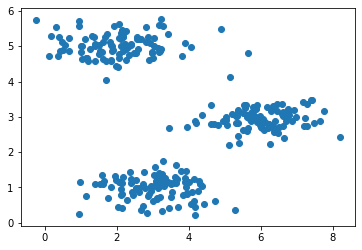

In [134]:
fig ,ax = plt.subplots(1,1)
ax.scatter(X[:,0], X[:,1])
plt.show()

#Based on the plot, we can start with an assumption of resonable number of clusters (K) = 3.

#### Cluster Assignment based on Random Cluster Centroids

In [135]:
X = data['X']
K = 3
ini_cent = np.array([[3,3],[6,2],[8,5]]) #--> Random Numbers

def cluster_assign(X, cent):
    m,n = X.shape
    clus_num = np.zeros([m,1])
    
    for i in range(m):
        delta = []
        for j in range(len(cent)):
            delta.append((sum((X[i,:] - cent[j,:])**2)))
        clus_num[i] = delta.index(min(delta))+1
    
    return clus_num

Clus_key = cluster_assign(X, ini_cent)

#### Moving Centroid Locations using mean values

In [136]:
def compute_means(X, Clus_key, K): 
    m,n = X.shape
    Merge = np.append(X, Clus_key, axis=1)
    cent_new = np.zeros([K,n])
    for i in range(K):
        leng = len(Merge[Merge[:,n]==i+1])
        cent_new[i] = sum(Merge[Merge[:,n]==i+1][:,0:n])/leng
    return cent_new

# Check
X = data['X']
K = 3
ini_cent = np.array([[3,3],[6,2],[8,5]]) #--> Random Numbers
Clus_key = cluster_assign(X, ini_cent)
upd_cent = compute_means(X, Clus_key,K)

print('The updated centroid locations based on mean of previous cluster assignment is:\n',upd_cent.round(4))

The updated centroid locations based on mean of previous cluster assignment is:
 [[2.4283 3.1579]
 [5.8135 2.6337]
 [7.1194 3.6167]]


# 2. Iterating on the Centroid position using Random Initialisation

The centroid locations are shown as stars:
 [[3.0437 1.0154]
 [6.0337 3.0005]
 [1.954  5.0256]]


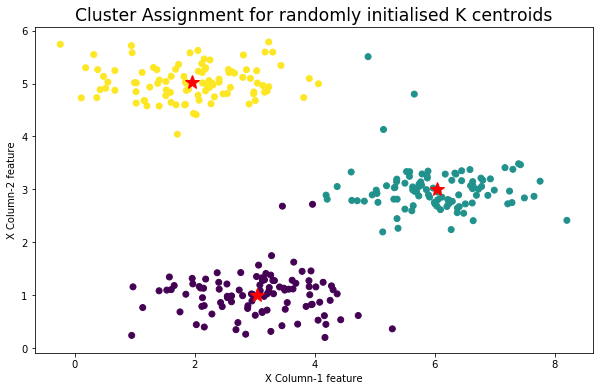

In [137]:
def Kcluster(X, ini_cent, num_iter):
    m,n = X.shape
    K = len(ini_cent)
    Clus_key = np.zeros([m,1])
    cent = ini_cent
    
    for i in range(num_iter):
        Clus_key = cluster_assign(X, cent)
        cent = compute_means(X, Clus_key, K)
           
    return cent, Clus_key 

####################################################################################
### Random Initialisation ###

X = data['X']
K = 3

ini_cent = np.zeros([K,X.shape[1]])
for i in range(K):
    ini_cent[i] = X[np.random.randint(0,len(X)),:]


K_centroids, K_Clus_key = Kcluster(X, ini_cent, num_iter=50)

#####################################################################################
### Plot ###

X_K = np.append(X, K_Clus_key, axis=1)

fig, ax = plt.subplots(1,1, figsize = (10,6))
ax.set_title('Cluster Assignment for randomly initialised K centroids', fontsize='xx-large')
ax.set_xlabel('X Column-1 feature')
ax.set_ylabel('X Column-2 feature')

ax.scatter(X_K[:,0], X_K[:,1], c=X_K[:,2], cmap='viridis')
ax.plot(K_centroids[:,0], K_centroids[:,1], marker='*', markersize=15, color='RED', linestyle='')
print(f'The centroid locations are shown as stars:\n {K_centroids.round(4)}')

plt.show()
    

# 3. Application: Pixel Compression
<blockquote>In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as
the RGB encoding. This image contains thousands of colors and will be reduced to 16 colors. <br><br>
Every pixel in the original image is a data example and the K-means algorithm is used to find the 16 colors that best group (cluster) the pixels in the 3-dimensional RGB space.<br><br>

In [138]:
pix_data = plt.imread('bird_small.png')
print(f'The size of the image (3D array) is {pix_data.shape}.\
\nThe first two indices indicate pixel position (128x128) and the last index indicates R,G or B.')

The size of the image (3D array) is (128, 128, 3).
The first two indices indicate pixel position (128x128) and the last index indicates R,G or B.


### Displaying the original picture and Re-arranging the image array
<blockquote>This step involves reshaping the image matrix into a 2D array of size (16384 x 3). This is done to allow simpler cluster synthesis.<br>
Before that, we are feature scaling the data by dividing it with 255.<br>
In other words, we are converting the 3D matrix to a 2D array.<br>
pix_data.shape[0] = pix_data[:,0,0] = 128 entities in command format.<br><br>
Reshape the image into an Nx3 matrix where N = number of pixels. Each row will contain the Red, Green and Blue pixel values
This gives us our dataset matrix X that we will use K-Means on.


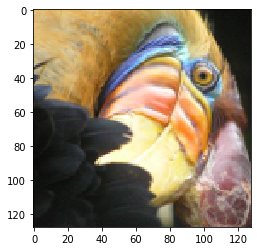

In [139]:
import matplotlib.image as mpimg
fig, ax = plt.subplots(1,1)
ax.imshow(pix_data)

In [140]:
pix = pix_data/255
pix = pix.reshape(pix.shape[0] * pix.shape[1], pix.shape[2])
print(f'The size of the 2D pixel data is {pix.shape}')

The size of the 2D pixel data is (16384, 3)


### Clustering the data using K-means (16 centroidal locations each storing 3 features - RGB)

In [141]:
X = pix
K = 16

ini_cent = np.zeros([K,X.shape[1]])
for i in range(K):
    ini_cent[i] = X[np.random.randint(0,len(X)),:]


K_centroids, K_Clus_key = Kcluster(X, ini_cent, num_iter=10)

In [142]:
print(f'The size of centroid array is {K_centroids.shape}')
print(f'The size of Cluster key array is {K_Clus_key.shape}')
print('\nWhat it essentially means is that we have segregated the entire 16384 colors into 16 clusters.\
\nEach centroid value indicates the nature of that cluster.\
\nThus, the cluster number will be mapped with the centroidal positional (color) data.')

The size of centroid array is (16, 3)
The size of Cluster key array is (16384, 1)

What it essentially means is that we have segregated the entire 16384 colors into 16 clusters.
Each centroid value indicates the nature of that cluster.
Thus, the cluster number will be mapped with the centroidal positional (color) data.


In [143]:
X2 = pix
K2 = 48

ini_cent = np.zeros([K2,X2.shape[1]])
for i in range(K2):
    ini_cent[i] = X2[np.random.randint(0,len(X2)),:]


K_centroids_2, K_Clus_key_2 = Kcluster(X2, ini_cent, num_iter=10)

### Mapping and Displaying the Compressed Image
<blockquote>Essentially, each row of the pixel data (X) is represented by a number between 1-16, indicating the cluster it belongs to.<br>
And each cluster is represented by its RGB data (feature data) in the form of centroid.<br>
Thus, we need to map the cluster number with its corresponding centroidal data.

In [144]:
#### Mapping cluster key to centroidal (pixel) data ####

def img_map(K, cent_data, cluster_keys):
    m = len(K_Clus_key)
    n = K_centroids.shape[1]
    X_compress = np.zeros([m,n])

    for i in range(K):
        for j in range(len(K_Clus_key)):
            if K_Clus_key[j] == i+1:
                X_compress[j,:] = K_centroids[i]
    
    return (X_compress * 255).reshape(128,128,3)

Text(0.5, 1.0, 'Compressed 128 bit 48-Cluster Image')

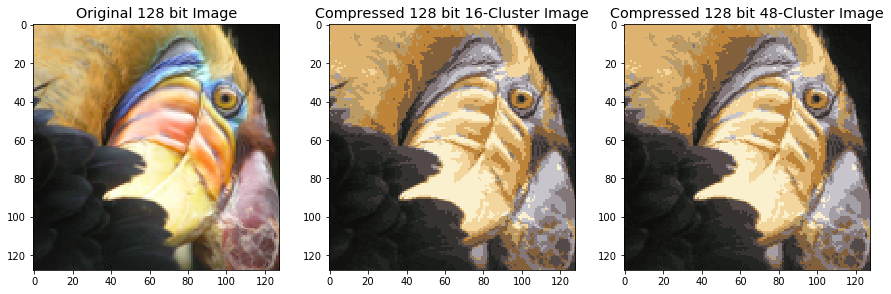

In [145]:
#### Display the Compressed Image and the original image as well ####

pix_cluster_16 = img_map(K, K_centroids, K_Clus_key)
pix_cluster_48 = img_map(K2, K_centroids_2, K_Clus_key_2)

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(pix_data)
ax[1].imshow(pix_cluster_16)
ax[2].imshow(pix_cluster_48)

ax[0].set_title('Original 128 bit Image', fontsize='x-large')
ax[1].set_title('Compressed 128 bit 16-Cluster Image', fontsize='x-large')
ax[2].set_title('Compressed 128 bit 48-Cluster Image', fontsize='x-large')
